<a href="https://colab.research.google.com/github/Sidharth-NK/ML_PROJECTS/blob/main/most_dominant_colors_in_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

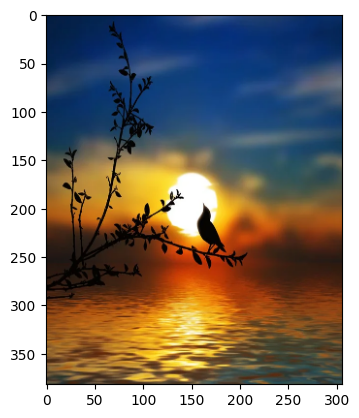

In [9]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np
img = cv2.imread('/content/landscapeimage.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(306,382))
plt.imshow(img)


In [4]:
# the logic is to map each color in a 3 dimensional space and look for the centroid having most data points
# each pixel is one datapoint

X = img.reshape((-1,3))
print(X.shape)


(116892, 3)


In [7]:
#model

k = 4 # change this number to print more number of dominant colors in the image
model = KMeans(n_clusters=k)
model.fit(X)

KMeans(n_clusters=4)

In [8]:
# this will return a 4x3 matrix, indicating 4 dominant colors with RGB values(3 values)
centroids = model.cluster_centers_ # the centroids are available in this function
print(centroids)

[[163.96282236  96.29632302  34.67161323]
 [238.50750641 200.85161113  97.37074332]
 [ 63.08205445  38.51503817  22.87263824]
 [ 31.77697259  66.30357143 108.70759967]]


In [12]:
colors = np.array(centroids,dtype = 'uint8')
print(colors)

[[163  96  34]
 [238 200  97]
 [ 63  38  22]
 [ 31  66 108]]


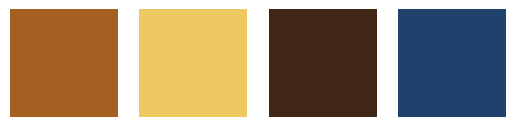

In [22]:
# to show the most dominant color, we will be ploting the colorpatches of the most dominant color
# for showing the color patches we will be using matrix and copying the colors in previos cell and plotting it
i=1
for color in colors:
  plt.subplot(1,k,i)
  plt.axis('off')
  i=i+1
  mat = np.zeros((100,100,3),dtype='uint8')
  mat[:,:,:] = color
  plt.imshow(mat)